<h3><center>Alexandra Almeida</center></h3> 
<h1><center>Project "Green Chillies Prices in India"</center></h1>
<img src="https://upskill.pt/wp-content/uploads/2020/03/cropped-APDC_UPSKILLS_Logo-300x83.png" width="200" align="center">

The present project was carried out under the Machine Learning module as part of the UpsKill program.

I have select a public dataset which contains a time list of chili peppers prices in India over 2048 days. The goal is to forecast prices for next 90 days.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
#from pandas.core import datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [2]:
# import excel file and convert into pandas
df = pd.read_csv('Chillies Prices in India.csv', delimiter=';')
df.head()

,datesk,Item Name,Date,price
0,20110101,Chillies Green,01/01/2011,NaN
1,20110101,Chillies Bajji,01/01/2011,NaN
2,20110101,Chillies Cleaned,01/01/2011,NaN
3,20110101,Chillies small (C.B.P),01/01/2011,NaN
4,20110101,Chillies Bajji yagani,01/01/2011,NaN


In [3]:
# check dataframe'shape
df.shape

(13065, 4)

In [4]:
df = df[(df['Item Name']== 'Chillies Green')]
df.shape

(2613, 4)

In [5]:
#drop missing values
df.dropna(inplace=True)

In [6]:
#convert the 'Date' column into a datetime format so that it can interpreted as a date
df['Date'] = pd.to_datetime(df['datesk'], format="%Y%m%d")
df.head()

,datesk,Item Name,Date,price
339,20110309,Chillies Green,2011-03-09,30.0
340,20110310,Chillies Green,2011-03-10,30.0
360,20110314,Chillies Green,2011-03-14,30.0
370,20110316,Chillies Green,2011-03-16,30.0
378,20110317,Chillies Green,2011-03-17,30.0


In [7]:
# remove column 'datesk' and 'Item Name'
df.drop(columns = ['datesk','Item Name'], inplace=True)

In [8]:
# remove rows where price is 0
df = df[~(df['price']== 0)]
df.reset_index(drop=True, inplace=True)
df.shape

(2048, 2)

In [9]:
# get the general descriptive statistics from data
df.describe()

,price
count,2048.000000
mean,35.721191
std,21.060151
min,16.000000
25%,25.000000
50%,30.000000
75%,40.000000
max,598.000000


After cleaning all columns and rows not needed, we can plot the data and visualize the prices evolution. We can see 2 data points where prices were much higher than usual.

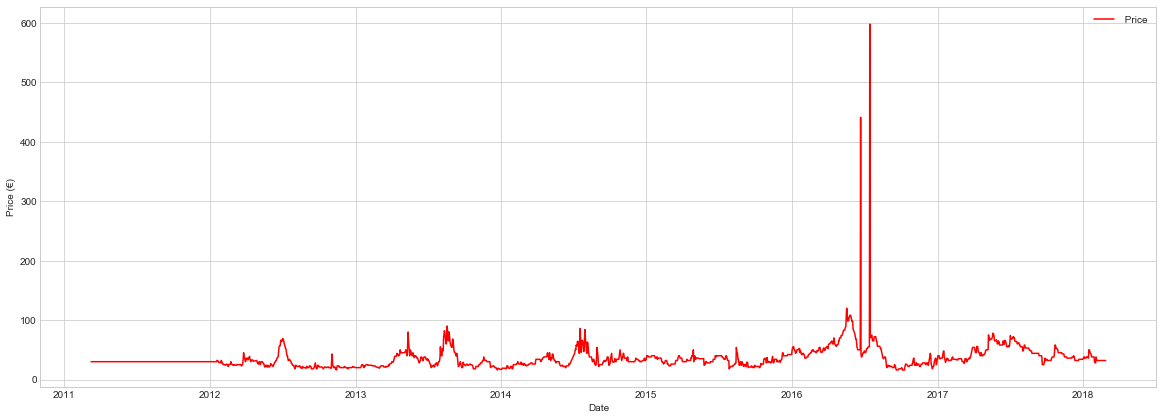

In [10]:
df.sort_values(by=['Date'], ascending = True, inplace = True)

# creating a pot in order to visualize the price evolution.
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['price'].values, label = ' Price', color = 'red')
# plt.xticks(np.arange(100,df.shape[0],100))
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

In [11]:
# sort the dataframe by descending price in order to find the 2 outlier prices
df.sort_values(by=['price'], ascending=False)

,Date,price
1592,2016-07-15,598.0
1574,2016-06-22,441.0
1544,2016-05-18,120.0
1545,2016-05-19,115.0
1551,2016-05-26,108.0
...,...,...
1649,2016-10-07,16.0
1648,2016-10-06,16.0
1638,2016-09-22,16.0
1639,2016-09-24,16.0


In [12]:
#remove prices values 598.0 and 441.0
outliers = df.index[[1574,1592]]
df.drop(outliers, inplace=True)

## Prophet

In [13]:
# install Facebook Prohet
# !pip install fbprophet

In [14]:
df.rename(columns={'price': 'y', 'Date': 'ds'}, inplace=True)

In [24]:
df.tail()

,ds,y
2043,2018-02-22,32.0
2044,2018-02-23,32.0
2045,2018-02-24,32.0
2046,2018-02-26,32.0
2047,2018-02-27,32.0


In [16]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [17]:
future_prices = m.make_future_dataframe(periods=30)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2071,2018-03-25,47.019926,33.682687,60.376504
2072,2018-03-26,44.193711,31.466718,58.169818
2073,2018-03-27,44.775326,31.515725,57.536503
2074,2018-03-28,45.028400,31.711694,58.277215
2075,2018-03-29,45.166750,31.940784,58.135285


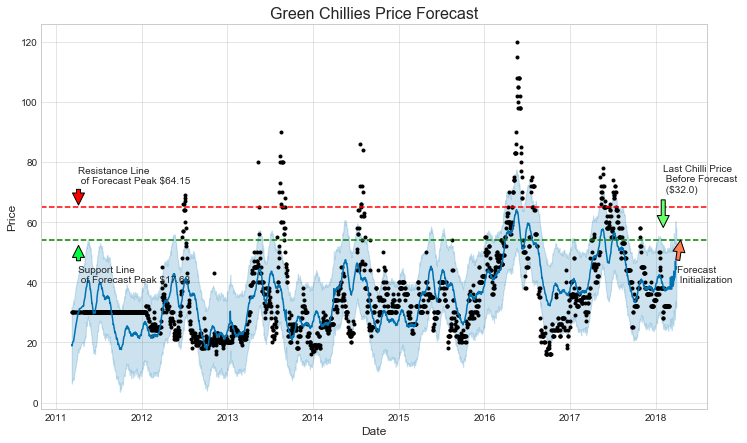

In [28]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018,4 , 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 2, 1)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 4, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Dates Forecasting Resistance Line
resistance_date = dt.datetime(2011, 4, 7)
resistance_date1 = mdates.date2num(resistance_date)

# Dates Forecasting Support Line
support_date = dt.datetime(2011, 4, 7)
support_date1 = mdates.date2num(support_date)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Green Chillies Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 55), xytext=(starting_date1,40),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )


# Trend emphasis arrow
ax1.annotate('Last Chilli Price \n Before Forecast \n ($32.0)', xy=(trend_date1, 57), xytext=(trend_date1,70),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

# Resistance Line
ax1.annotate('Resistance Line \n of Forecast Peak ${:.2f}'.format(forecast["yhat"].max()), xy=(resistance_date1, 65), xytext=(resistance_date1,73),
            arrowprops=dict(facecolor='#FF0000', shrink=0.1),
            )

# Support Line
ax1.annotate('Support Line \n of Forecast Peak ${:.2f}'.format(forecast["yhat"].min()), xy=(support_date1, 53), xytext=(support_date1,40),
            arrowprops=dict(facecolor='#00FF40', shrink=0.1),
            )


ax1.axhline(y=65, color='r', linestyle='--')
ax1.axhline(y=54.2, color='g', linestyle='--')


plt.show()

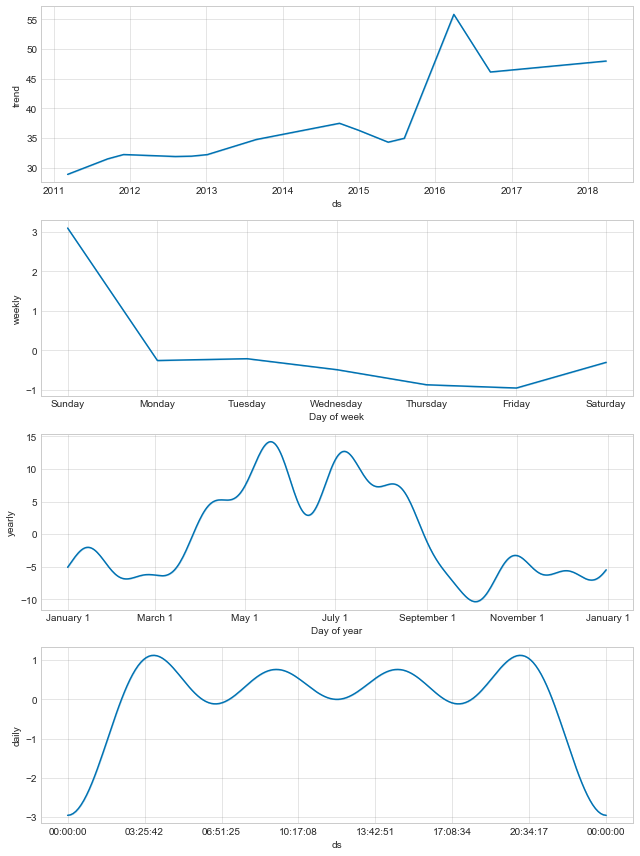

In [19]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


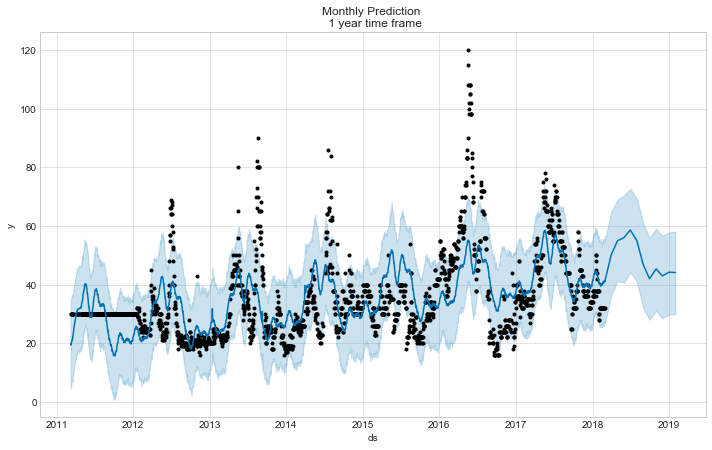

In [20]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()